Assuming that every human on the planet is working everyday, what is the best time of the day to maximize attendance to a global work meeting?

In [1]:
import pandas as pd

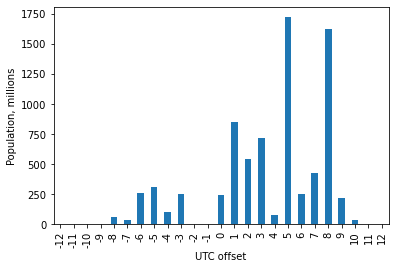

In [2]:
# Population by UTC Time 
# source: Tab.1 in Crump & Davies (2021) http://doi.org/10.1136/bmjopen-2021-056696
# Given in normal time, not summer time (e.g. CET is UTC+1)
df = pd.read_csv('utc_pop.csv')
df.plot(x='UTC offset', kind='bar', ylabel='Population, millions', legend=None);

In [3]:
def compute_meeting_population(hh, h1=9, h2=17):
    '''
    returns the total population available at meeting time
    hh: meeting time in hr UTC
    h1,h2: first and last hour of a decent working day
    df global variable read above
    '''
    # add meeting local time to every row of df
    df['meeting LT'] = df.apply(lambda x : hh + x['UTC offset'], axis=1)
    # compute total population between h1 and h2
    return df['Population'][df['meeting LT'].between(h1,h2)].sum()


In [4]:
dftime = pd.DataFrame({'Meeting time in UTC':range(0,24)})
dftime['Population'] = dftime.applymap(compute_meeting_population)

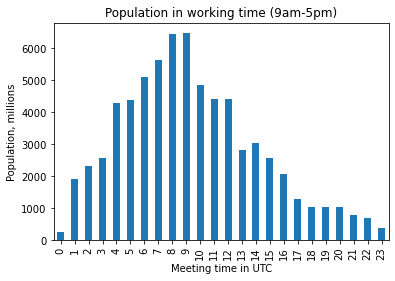

In [5]:
dftime.plot(
    x='Meeting time in UTC', 
    kind='bar', 
    legend=None, 
    ylabel='Population, millions',
    title='Population in working time (9am-5pm)'
);

In [9]:
def h1h2(d,ct=13):
    '''
    returns min and max hours of a working day of duration d
    ct: center time
    '''
    h1 = ct - d/2
    h2 = ct + d/2  
    return (h1,h2)

def max_population(d):
    '''
    returns the maximum population
    '''
    h1, h2 = h1h2(d['Working time duration'],ct=13)
    dftime = pd.DataFrame({'Meeting time in UTC':range(0,24)})
    dftime['Population'] = dftime.apply(compute_meeting_population, h1=h1, h2=h2, axis=1)
    ix = dftime['Population'].idxmax()
    return (dftime['Population'].max(), dftime['Meeting time in UTC'][ix])

dflen = pd.DataFrame({'Working time duration':range(8,18,2)})
dflen[['Maximum population','Optimal time in UTC']] = dflen.apply(
    max_population, result_type='expand', axis=1)

In [10]:
# add intervals for the plot
dflen['Working time interval'] = dflen['Working time duration'].apply(
    lambda x : pd.Interval(
        left = int(h1h2(x)[0]),
        right = int(h1h2(x)[1])))
dflen

,Working time duration,Maximum population,Optimal time in UTC,Working time interval
0,8,6469.67,9.0,"(9, 17]"
1,10,6723.60,8.0,"(8, 18]"
2,12,6944.53,10.0,"(7, 19]"
3,14,7403.31,12.0,"(6, 20]"
4,16,7664.86,12.0,"(5, 21]"


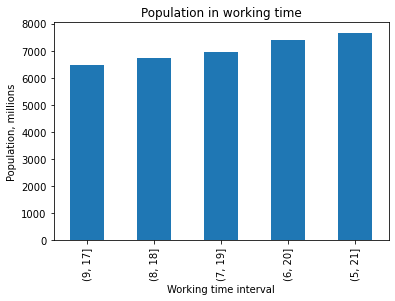

In [11]:
dflen.plot(
    x='Working time interval',
    y='Maximum population', 
    kind='bar', 
    legend=None,
    ylabel='Population, millions',
    title='Population in working time'
);

In conclusion, the best time of the day to maximize attendance to a global meeting depends on the duration of the working day. If all humans work 8 hours per day from 9am to 5pm (local time), then the best hour of the day to maximize attendance is 9:00 UTC. This would allow people living in countries from UTC+0 (east Europe) to UTC+8 (China) to attend the meeting, but it would exclude people living in the Americas.